In [ ]:
# Web scraper for KanView website that provides payroll data for the state of Kansas
# Selenium is used to handle the javascript on a website

#Importing libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os     #to manipulate files



In [ ]:
chrome_path = r'C:\Users\Abraham\Downloads\Apps\chromedriver'
# prepend it with r because of the backslash characters

driver = webdriver.Chrome(chrome_path) # This will open up a chrome window

page = 2557
url = "https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations/p" + str(page)

driver.get(url)  # Open that website


In [ ]:
userlist = []
datelist = []
postlist = []
quotelist = []
while len(postlist)<5000:
    #User
    users = driver.find_elements_by_class_name('Username')
    for user in users:
        userlist.append(user.text)
    
    #Date
    dates = driver.find_elements_by_class_name('DateCreated')
    for date in dates:
        datelist.append(date.text)
    
    # This is the list of all the comments
    posts = driver.find_elements_by_class_name('Item-Body')
    for post in posts:
        postlist.append(post.text)

    # This is the list of the blockquotes that you don't want
    quotes = driver.find_elements_by_class_name('Quote')
    for quote in quotes:
        quotelist.append(quote.text)
        
    page = page - 1
    url = "https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations/p" + str(page)

    driver.get(url)
    


In [ ]:
# Now you have to delete quotes from the posts
for j in range(0,len(quotelist)):
    for i in range(0,len(postlist)):
        if (quotelist[j] in postlist[i]):
            postlist[i]=postlist[i].replace(quotelist[j],'')   

In [ ]:
len(postlist)

In [ ]:
df_raw = pd.DataFrame(datelist)
df_raw['Users'] = userlist
df_raw['Text'] = postlist
df_raw.columns = ['Date','User','Text']

In [ ]:
df_raw

In [ ]:
postfile_name = r'C:\Users\Abraham\MSBA\Text\HW2\postfile.csv'
df_raw.to_csv(postfile_name)

# 3

In [1]:
import pandas as pd
posts=pd.read_csv('postfile.csv',encoding='cp1252')

In [2]:
posts = posts.replace(r'\n',' ', regex=True)
posts = posts.replace(r'\r',' ', regex=True)
posts.head(2)

,Unnamed: 0,Date,User,Text
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...


In [3]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:

# Concatenating entire text
all_text=posts['Text'].str.cat(sep=' ')

# Remove punctuation, digits & others, convert to lower and finally stopwords
from string import punctuation
for p in punctuation:
    all_text =all_text.replace(p,'')
all_text =re.sub('[0-9]+','',all_text)
all_text=all_text.lower()
all_text_list =re.findall('\w+',all_text)


from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
all_text_list_clean = [w for w in all_text_list if not w in stop_words]


In [5]:
words_in_texts=nltk.FreqDist(all_text_list_clean)

In [6]:
words_in_texts=pd.DataFrame.from_dict(words_in_texts, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)

In [7]:
car_mapping=pd.read_csv('car-list.csv')

In [8]:
def lowering (s):
    return s.lower()
car_mapping['model']=car_mapping['model'].map(lowering)
car_mapping['brand']=car_mapping['brand'].map(lowering)

In [9]:
check1=pd.Series(words_in_texts.index.values)

In [10]:
check2=pd.Series(car_mapping['model'])

In [11]:
sum(check1.isin(check2))

133

In [12]:
a = ['a', 'b', 'c', 'd', 'b']
b = set(a)

In [13]:
list(b)

['d', 'c', 'b', 'a']

### 3 Task A

In [14]:
from string import punctuation
def unique_words(s):
# Remove punctuation, digits & others, convert to lower and finally stopwords
    s=str(s)
    for p in punctuation:
        s =s.replace(p,'')
    s=s.lower()
    return list(set(re.findall('\w+',s)))

posts['unique_words_list']=posts['Text'].map(unique_words)

In [15]:
# Mapping  to brand

In [16]:
car_mapping=pd.read_csv('car-list.csv')
def lowering (s):
    s=s.rstrip()
    return s.lower()
car_mapping['model']=car_mapping['model'].map(lowering)
car_mapping['brand']=car_mapping['brand'].map(lowering)

In [36]:
def mentioned_brands(list_1):
    list_i=pd.DataFrame(list_1)
    mask=car_mapping['model'].isin(pd.Series(list_1))
    joiner=car_mapping[mask]
    joined=joiner.merge(list_i, left_on='model', right_on=0)
    out=set(list(joined['brand']))
    return list(out)

posts['unique_brands']=posts['unique_words_list'].map(mentioned_brands)


In [37]:
unique_brands_superlist=posts['unique_brands'].sum()
unique_brands=nltk.FreqDist(unique_brands_superlist)
unique_brands=pd.DataFrame.from_dict(unique_brands, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)

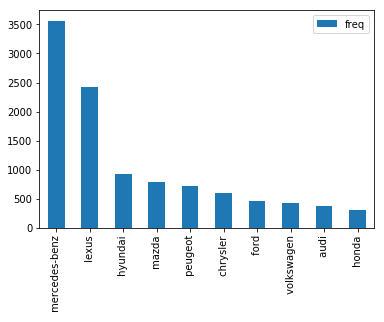

In [38]:
unique_brands[:10].plot(kind='bar')

In [39]:
unique_brands.index.values

array([' mercedes-benz', ' lexus', ' hyundai', ' mazda', ' peugeot',
       ' chrysler', ' ford', ' volkswagen', ' audi', ' honda', ' nissan',
       ' subaru', ' chevrolet', ' infiniti', ' bmw', ' kia',
       ' alfa romeo', ' mini', ' jeep', ' fiat', ' rover', ' volvo',
       ' toyota', ' dodge', ' renault', ' saab', ' jaguar', ' mitsubishi',
       ' porsche', ' land rover', ' suzuki', ' daewoo', ' opel', ' smart',
       ' seat'], dtype=object)

In [40]:
import numpy as np
from itertools import combinations, groupby
from collections import Counter

# Sample data
unique_brands_list = list(unique_brands.index.values)


In [41]:
def combination_of_2(set):
    return list(combinations(set,2))

posts['combinations_of_2']=posts['unique_brands'].map(combination_of_2)

In [42]:
set_of_1=posts['unique_brands'].sum()
set_of_2=posts['combinations_of_2'].sum()

In [43]:
from collections import Counter
count_1s=Counter(set_of_1)

In [44]:
count_2s=Counter(set_of_2)

In [46]:
unique_name=unique_brands.index.values
matrix = pd.DataFrame(index=unique_name, columns=unique_name)

In [101]:
for row in unique_name:
       for column in unique_name:
            if row==column:
                matrix.loc[row,column]=0
            else:
                matrix.loc[row,column]=(count_2s[(row, column)]+count_2s[(column, row)])/(count_1s[row]*count_1s[column])
            

In [102]:
matrix.head(5)

,mercedes-benz,lexus,hyundai,mazda,peugeot,chrysler,ford,volkswagen,audi,honda,...,saab,jaguar,mitsubishi,porsche,land rover,suzuki,daewoo,opel,smart,seat
mercedes-benz,0.000000,0.000240,0.000175,0.000246,0.000176,0.000178,0.000218,0.000264,0.000246,0.000209,...,0.000281,0.000263,0.000281,0.000234,0.000281,0.000211,0.000281,0.000281,0.000281,0.000140
lexus,0.000240,0.000000,0.000164,0.000270,0.000174,0.000183,0.000233,0.000320,0.000320,0.000212,...,0.000309,0.000180,0.000263,0.000275,0.000206,0.000309,0.000309,0.000413,0.000275,0.000206
hyundai,0.000175,0.000164,0.000000,0.000341,0.000559,0.000661,0.000049,0.000102,0.000067,0.000066,...,0.000135,0.000135,0.000098,0.000180,0.000000,0.000270,0.000270,0.000000,0.000000,0.000000
mazda,0.000246,0.000270,0.000341,0.000000,0.000136,0.000138,0.000229,0.000356,0.000356,0.000260,...,0.000627,0.000313,0.000570,0.000209,0.000940,0.000313,0.000000,0.000835,0.000000,0.000627
peugeot,0.000176,0.000174,0.000559,0.000136,0.000000,0.000844,0.000057,0.000102,0.000451,0.000084,...,0.000232,0.000261,0.000759,0.000232,0.000000,0.000348,0.000348,0.000000,0.000000,0.000000


In [103]:
matrix.iloc[:10,:]

,mercedes-benz,lexus,hyundai,mazda,peugeot,chrysler,ford,volkswagen,audi,honda,...,saab,jaguar,mitsubishi,porsche,land rover,suzuki,daewoo,opel,smart,seat
mercedes-benz,0.000000,0.000240,0.000175,0.000246,0.000176,0.000178,0.000218,0.000264,0.000246,0.000209,...,0.000281,0.000263,0.000281,0.000234,0.000281,0.000211,0.000281,0.000281,0.000281,0.000140
lexus,0.000240,0.000000,0.000164,0.000270,0.000174,0.000183,0.000233,0.000320,0.000320,0.000212,...,0.000309,0.000180,0.000263,0.000275,0.000206,0.000309,0.000309,0.000413,0.000275,0.000206
hyundai,0.000175,0.000164,0.000000,0.000341,0.000559,0.000661,0.000049,0.000102,0.000067,0.000066,...,0.000135,0.000135,0.000098,0.000180,0.000000,0.000270,0.000270,0.000000,0.000000,0.000000
mazda,0.000246,0.000270,0.000341,0.000000,0.000136,0.000138,0.000229,0.000356,0.000356,0.000260,...,0.000627,0.000313,0.000570,0.000209,0.000940,0.000313,0.000000,0.000835,0.000000,0.000627
peugeot,0.000176,0.000174,0.000559,0.000136,0.000000,0.000844,0.000057,0.000102,0.000451,0.000084,...,0.000232,0.000261,0.000759,0.000232,0.000000,0.000348,0.000348,0.000000,0.000000,0.000000
chrysler,0.000178,0.000183,0.000661,0.000138,0.000844,0.000000,0.000819,0.000088,0.000081,0.000091,...,0.000069,0.000104,0.000303,0.000000,0.000000,0.000000,0.000417,0.000556,0.000000,0.000833
ford,0.000218,0.000233,0.000049,0.000229,0.000057,0.000819,0.000000,0.000194,0.000188,0.000181,...,0.000091,0.000136,0.000791,0.000725,0.000000,0.000543,0.001087,0.001449,0.000000,0.002174
volkswagen,0.000264,0.000320,0.000102,0.000356,0.000102,0.000088,0.000194,0.000000,0.000880,0.000337,...,0.000287,0.001720,0.000417,0.000382,0.000573,0.001147,0.000573,0.000765,0.000000,0.000000
audi,0.000246,0.000320,0.000067,0.000356,0.000451,0.000081,0.000188,0.000880,0.000000,0.000181,...,0.000225,0.000169,0.000246,0.000901,0.000676,0.000000,0.000000,0.000000,0.000000,0.000000
honda,0.000209,0.000212,0.000066,0.000260,0.000084,0.000091,0.000181,0.000337,0.000181,0.000000,...,0.000266,0.002196,0.000290,0.000532,0.000799,0.001597,0.000799,0.000000,0.000000,0.000000


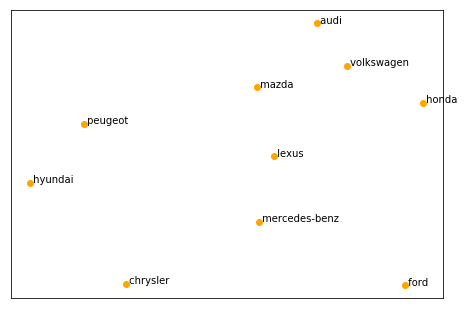

In [114]:
matrix_1=matrix.iloc[:10,:10]

import numpy as np
from sklearn import manifold
from sklearn.manifold import MDS

mdsdf = 1/matrix_1

mdsdf=mdsdf.replace(np.nan,0)
mdsdf=mdsdf.replace(np.inf,0)

mdsmatrix=mdsdf.values

from matplotlib import pyplot as plt

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=6)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

ax=plt.axes([0.,0.,1.,1.])
plt.scatter(x,y,marker='o',color='orange')

n=list(mdsdf.index)

for i,n in enumerate(n):
    #print(x[i].item())
    #print(n)
    #print(type(y[i]))
    if n=='kia':
        ax.annotate(n,xy=((x[i]+.01),y[i]-.01))
    else:
        ax.annotate(n,xy=((x[i]+.01),y[i]-.02))

plt.xticks([])
plt.yticks([])

plt.show()


